# Support Vector Machines (SVM)

Is a powerful supervised learning method used for both classification and regression tasks. It is particularly effective when dealing with complex and high-dimensional data. SVM aims to find an optimal hyperplane that maximally separates different classes or fits the data points in regression.

The basic idea behind SVM is to transform the input data into a higher-dimensional feature space, where it becomes easier to find a hyperplane that separates the data points of different classes. The hyperplane is chosen in such a way that it maximizes the margin, which is the distance between the hyperplane and the closest data points of each class. These closest data points are called support vectors, hence the name "Support Vector Machines."

Mathematically, SVM can be represented as follows: For binary classification: 

$w·x + b ≥ 1$ if $y = 1 $

$w·x + b ≤ -1$ if $y = -1$

Where:

$x$ represents the input feature vector.

$w$ represents the weight vector perpendicular to the hyperplane.

$b$ represents the bias term or intercept.

$y$ represents the class label (+1 or -1).

The objective of SVM is to find the optimal values of w and b that minimize the classification error and maximize the margin. This optimization problem can be formulated as a quadratic programming problem and solved using various approaches, including the Sequential Minimal Optimization (SMO) algorithm.

## Approaches in SVM:

* *Linear SVM*: In this approach, a linear hyperplane is used to separate the classes. It is suitable when the data is linearly separable.

* *Non-linear SVM*: In cases where the data is not linearly separable, SVM can utilize the kernel trick to map the data into a higher-dimensional space. This allows for the use of non-linear decision boundaries, such as polynomial or radial basis function (RBF) kernels.

## SVM advantages

* Effective in high-dimensional spaces and with complex data.
* Robust against overfitting, thanks to the margin maximization.
* Versatile due to different kernel functions available for non-linear problems.
* Handles both classification and regression tasks.

Target values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target names:
['setosa' 'versicolor' 'virginica']
Predicted:
[0 0 2 2 1 0 0 2 2 1 2 0 1 2 2]
Expected:
[0 0 2 2 1 0 0 2 2 1 2 0 2 2 2]
Accuracy:
0.9333333333333333
Confusion Matrix:
[[5 0 0]
 [0 2 0]
 [0 1 7]]


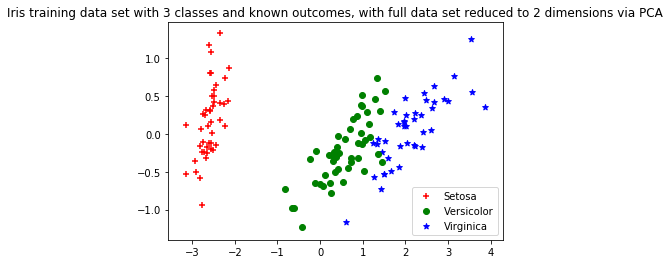

In [7]:
# Predictive Analytics for Dummies, 2nd Edition, Anasse Bari, Ph.d.
# Support Vector Machine (SVM, page 277)
#
# Steps
# 1) Load data
# 2) Choose an algorithm/classifier
# 3) Train the model
# 4) Visualize the model
# 5) Test the model
# 6) Evaluate the model

# See: http://www.numpy.org
import numpy as np
import sklearn
#import scipy

# load a data set
from sklearn.datasets import load_iris
iris = load_iris()

print ("Target values:")
print (iris.target)
print ("Target names:")
print (iris.target_names)


# create an instance of the SVM classifier. LinearSVC = Linear Support Vector Classifier
# http://scikit-learn.org/stable/modules/svm.html#classification
from sklearn.svm import LinearSVC
svmClassifier = LinearSVC(random_state=111, max_iter=3000)


# separate the data set into: training examples and test samples
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data,
    iris.target, test_size=0.10, random_state=111)


# train the model with the training set
svmClassifier.fit (X_train, y_train)

# run the test data, make the predictions
predicted = svmClassifier.predict (X_test)
print ("Predicted:")
print (predicted)
print ("Expected:")
print (y_test)

# measure performance of the prediction/model
from sklearn import metrics
accuracy = metrics.accuracy_score (y_test, predicted)
print ("Accuracy:")
print (accuracy)
# correct outcomes/test_size = 14/15 = 0.933333

# the mean absolute error of the model is: 1 - accuracy
metrics.mean_absolute_error (y_test, predicted)


# create confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
print ("Confusion Matrix:")
print (cm)


# Plot the iris data. But first we reduce the number of dimensions
# using Principal Component Analysis (PCA)
# PCA is performed ONLY FOR VISUALIZATION PURPOSES!!!
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
#pca = PCA(n_components=2).fit(iris.data)
#pca_2d = pca.transform(iris.data)

import pylab as pl
for i in range(0, pca_2d.shape[0]) :
    if   y_train[i] == 0 :
        c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="r", marker="+")
    elif y_train[i] == 1 :
        c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="g", marker="o")
    elif y_train[i] == 2 :
        c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c="b", marker="*")

pl.legend ([c1, c2, c3], ["Setosa", "Versicolor", "Virginica"])
    
pl.title ('Iris training data set with 3 classes and known outcomes, with full data set reduced to 2 dimensions via PCA')
    
pl.show ()
    
